# Calculus Class 10 October 2019:
# Parameterized functions and curve-fitting

In [153]:
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import pandas as pd
from IPython.display import Image

## Parameterized functions

Class question - what is a parameterized function?

A parameterized function is a function with internal variables that we can set. For example, we can write a linear function as 

$$y=mx+b$$

By changing the parameter $b$, we can shift the function up or down. Using the parameter $m$, we can control the slope. For every combination of $m$ and $b$, we can plot a line with that slope and intercept.

Example parameterized functions:
$$y(x)=mx+b$$
$$y(x)=ae^{-bx}+c$$
$$y(x)=ax^3 + bx^2 + cx + d$$
$$y(x)=(x-a)(x-b)(x-c)(x-d)$$

A useful tool/program for visualizing the effect of parameters is Desmos (www.desmos.com/calculator). Open up Desmos on your computer now and try plugging in some of these functions. If you don't have a computer, you can look on with a friend or download the app on your phone. When prompted, add sliders and experiment by moving them around and watching what happens to the function.

One reason why parameterized functions are important is because they can be "tuned" to obtain some function that we want. In the case of the last example, $y(x) = (x-a)(x-b)(x-c)(x-d)$, we can use parameters to place the roots of the polynomial where we want. This comes in handy when making factoring problems as a teacher - just pick the root parameters, multiply out, and assign to students!

Another way to use parameters is to adjust them to match data that we collected. Here's an example of that.

## Data collection example

Parameterized functions can be used to analyze data. In many cases, we have an idea of what type of function our data comes from, but we don't know exactly what it is.

Suppose we are working in a chemistry lab. We have synthesized a radioactive element and we want to know which radioactive element we just produced. One way to approach the problem is to find the element's half life - the amount of time it takes for half of the original mass to decay. Different elements decay at different rates, so if we have a way of getting a rate from the data, we can find the closest match in a reference table to verify which element we created.

In order to collect data, we take our sample and place it on a scale. Then, we periodically record the mass of the sample along with the time that we recorded the sample. Using this data, we can make a plot of time versus mass.

In [113]:
"""

Data generation:

This is a block of code that generates exponential decay data for this problem. In a real experiment, we would
collect this data by actually using a scale and a timer. However, it will make the problem easier if we know what
the correct answer is.

"""

nsteps = 1000 # number of data points
initial_mass = 88 # in pounds
t_half = 5.27 # in years
a = -np.log(0.5)/t_half # exponential coefficient (see below)
tmax = 20 # largest time to record at
time = np.linspace(0,tmax,nsteps) # generate a sequence of time recordings
mass = initial_mass*np.exp(-a*time) + np.random.normal(size=(nsteps,))*2 # compute mass at each time

df = pd.DataFrame(dict(time=time,mass=mass)) # collect data intoa special object

px.scatter(df,x='time',y='mass') # plot data

At this point, we can estimate what the half-life is. Judging by the graph, it looks like we have half the mass at approximately 5 years. However, if we want to be more precise, we can use a technique called curve-fitting.

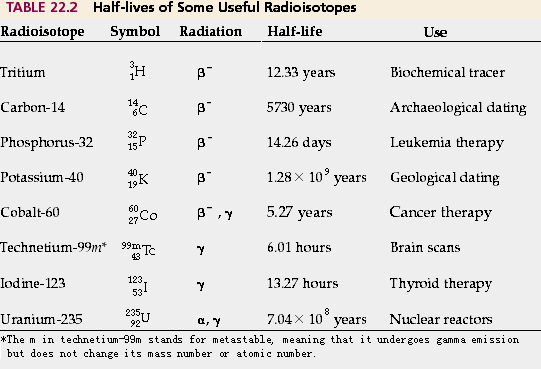

In [114]:
Image("half_lives.gif") # (this just prints an image)

Use the table above to take a guess at which element we created.

Image credit (see link for interesting radioactive carbon dating app): http://www.hayshighindians.com/academics/classes/csadams/Labs/Radioactive%20dating%20game.html

## Curve-fitting

Curve-fitting is a technique where we "tune" the parameters of a function to match our data. This process consists of six steps:

1. Define a parameterized "guess" function to fit to the data
2. Define a "cost" function that measures how close the model is to the data
3. Compute the cost of a single data point
4. Compute the derivative of the cost with respect to the parameters
5. Adjust the parameters to decrease the cost
6. Repeat steps 3-5 until convergence

#### Step 1: Start with a parameterized function

In the radioactive decay example, our initial step is to think of a parameterized function that models the data. As it turns out, radioactive elements decay according to exponential functions (we would know this if we were chemists). This means that our "guess" function for the data will have the form

$$m(t)=Me^{-at}+b$$

Where $m(t)$ is the mass at time $t$, and $M$, $a$, and $b$ are parameters to be determined.

However, before we move forward, we can eliminate $b$ from this equation. Notice that the longer we wait, the more mass decays. This means that if we wait long enough, our radioactive mass will eventually decay away to nothing. This means that $b=0$ because if $b\neq0$, then as time goes to $\infty$, we will still have some mass lying around. The equation then becomes

$$m(t)=Me^{-at}$$

Lastly, we can use this equation to find the estimated half-life. The half life is when the mass, $m(t)$, is equal to half the mass at time $t=0$. At $t=0$, $m(0)=M$, so we can now write:

$$\frac{1}{2}M = Me^{-at_{1/2}}\rightarrow t_{1/2} = \frac{-ln(\frac{1}{2})}{a}$$

This means that later on, when we try to find the correct $a$ value, we can use it to figure out what our estimate is.

#### Step 2: Define a cost function

Step 2 of the curve-fitting process is to define a cost function that tells us how well our parameterized function (our model) fits the data. A very common cost function is

$$Cost(x,y) = C(x,y) = (f(x) - y(x))^2 = (prediction - actual)^2 = (error)^2$$

where $f(x)$ is our prediction of the output (parameterized model output) for the value $x$ and $y(x)$ is the true output that we recorded for $x$. This is a good cost function because it increases as the prediction error increases, and it is never negative.

In the radioactive decay problem, our cost function is

$$C(t,y) = (m(t) - y(t))^2 = (Me^{-at} - y(t))^2$$

where $y(t)$ is the mass that we saw on the scale at time $t$ and $m(t)$ is our prediction of the mass at time $t$.

#### Step 3: Compute the cost of a single data point

Step 3 of the curve-fitting process is to compute the cost for a single data point. In order to do this, we need to make an intial guess at the parameters, and select one data point. Suppose our initial parameters and data point are:

$$M=100$$
$$a=0.1$$
$$t = 0$$
$$y = 88$$

This results in a cost of

$$C(t,y) = C(0,88) = (100e^{-1*0} - 88)^2 = (100-88)^2=12^2=144$$

In [156]:
# Step 3 in code form...

M = 100
a = 0.1
t = 0
y = 88

C = (M*np.exp(-a*t) - y)**2
print('C =',C)

# alternatively,
def C(t,y):
    return (M*np.exp(-a*t) - y)**2

print('C(t,y) =',C(t,y))

C = 144.0
C(t,y) = 144.0


#### Step 4: Compute the derivative of the cost with respect to the parameters (this is where the calculus comes in)

Now that we have determined the cost for a data point, we want to figure out how to make the cost go down. Ideally, our model parameters are so good that the cost is always zero no matter what data point we plug in. In order to decrease the cost of our model, we use calculus.

Remember the definition of a derivative: the amount of change in the output that we get by infinitesimally changing the input. In the curve fitting problem, we are interested in how much the cost will change if we adjust the parameters. For example, if the derivative of the cost with respect to the parameter $a$ is negative,

$$\frac{dC}{da} < 0,$$

then increasing $a$ will decrease the cost! Likewise, if the derivative of the cost with respect to $M$ is positive,

$$\frac{dC}{dM} > 0,$$

then *decreasing* $M$ will decrease the cost.

We can apply this idea to the decay problem. First, we need to take the derivative of the cost with respect to the parameters (using derivative rules that you will learn, or have already learned):

$$C(t,y) = (m(t) - y(t))^2 = (Me^{-at} - y(t))^2$$

$$\frac{dC}{dM} = 2(Me^{-at}-y(t))e^{-at}$$

$$\frac{dC}{da} = 2(Me^{-at}-y(t))(-Mte^{-at})$$

Next, we can plug in $M$, $t$, $y$, and $a$ from step 3 to find the cost derivative:

$$\frac{dC}{dM} = 2(100e^0 - 88)e^{-1*1*0} = 2*12 = 24$$
$$\frac{dC}{da} = 2(100e^0 - 88)*-100*0*e^{-1*1*0} = 0$$

Notice that $\frac{dC}{dM}$ is positive - in order to make the cost go down, we need to decrease $M$. This makes sense because the true mass at $t=0$ was 88, but we predicted that it would be 100. So decreasing $M$ will make our prediction come closer to the true value of 88.

Also notice that in this particular example $\frac{dC}{da}$ is actually zero. This is because we had to multiply by $t=0$ which cancelled everything. If $t\neq0$, we would get a nonzero answer. For instance,

$$a=0.0001$$
$$M=100$$
$$t=1000$$
$$y=78$$

In this case,

$$\frac{dC}{dM} = 2(100e^{-0.0001*1000} - 78)e^{-0.0001*1000} = 22.59$$
$$\frac{dC}{da} = 2(100e^{-0.0001*1000} - 78)*-100*1000*e^{-0.0001*1000} = -2,259,151$$

As you can see, the derivative with respect to the cost is extremely negative in this case.

In [120]:
# Step 4 in code form...

M = 100
a = 0.0001
t = 1000
y = 78

dcost_dm = 2*(M*np.exp(-a*t) - y)*np.exp(-a*t)
print('dcost_dm =',dcost_dm)

dcost_da = 2*(M*np.exp(-a*t) - y)*M*-t*np.exp(-a*t)
print('dcost_da =',dcost_da)

dcost_dm = 22.59151340198666
dcost_da = -2259151.340198666


#### Step 5: Adjust the parameters

The last thing we need to do is use the derivatives from step 3 to edit the parameters. The method we will use is called "gradient descent." The reason why it is called this is because we are descending (i.e. "walking down") the gradient. The word "gradient" is what multivariable calculus practitioners call a derivative when there are multiple variables.

Remember that the derivative of the cost with respect to the parameters tells whether we need to increase or decrease the parameters. For instance, we saw that $\frac{dC}{dM} > 0$, so we should decrease $M$ to decrease the cost. In equation form this is

$$M_{next} = M_{current} - k\frac{dC}{dM}$$

where $k$ is a number that controls how large the adjustment is. By subtracting $k\frac{dC}{dM}$ from $M_{current}$, we are *decreasing* $M$ if $\frac{dC}{dM}$ is positive.

This equation tells us that in order to get our new $M$-value, we take the current $M$-value and subtract a rescaled version of the derivative. For this problem, we will use $k=0.1$. For the radioactive decay problem, this tells us that our new $M$-value will be

$$M_{next} = 100 - 0.1*22.59 = 100 - 2.259 = 97.74$$

After making this update, our new $M$ will be smaller. This agrees with our earlier intuition that positive cost means we should subtract from the parameter.

#### Step 6: Repeat steps 3-5 until convergence

The final step is to repeat steps 3-5 until convergence. Convergence simply means that the cost has decreased to the lowest value that we can get, and is no longer changing as we consume data points. Below is a code snippet that performs curve-fitting on the exponential data from earlier.

Text(0.5, 1.0, 'Data and initial predictions')

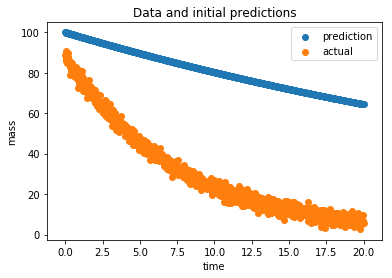

In [154]:
M = 100
a = 0.022 # initial guess for t_half is 10 in this case

def m(t):
    """
    m(t)
    
    Prediction function.
    
    input:
        t - time
    
    output:
        mass - prediction for mass at time t
    """
    return M*np.exp(-a*t)

h1 = plt.scatter(time,m(time))
h2= plt.scatter(time,mass)
plt.xlabel('time')
plt.ylabel('mass')
plt.legend(dict(prediction=h1,actual=h2))
plt.title('Data and initial predictions')
# help(plt.legend)

prediction = 91.44711038494191
y = 51.23878203160032
t = 4.064064064064064
M = 100
a = 0.022
dcost_dm = 73.53870882644036
dcost_da = -29886.602385920705
dcost_dm*k = 7.353870882644035e-05
dcost_da*k = -0.029886602385920703
--------------------------------------------------------------
prediction = 12.239048785735333
y = 12.220469092178362
t = 14.194194194194194
M = 99.79945573144234
a = 0.14784433272637149
dcost_dm = 0.004557094509206547
dcost_da = -6.455456379990199
dcost_dm*k = 4.557094509206547e-09
dcost_da*k = -6.455456379990199e-06
--------------------------------------------------------------
prediction = 19.14488251726701
y = 18.9409158541545
t = 11.29129129129129
M = 99.60354314038698
a = 0.14605612827372488
dcost_dm = 0.0784092147650645
dcost_da = -88.18312875830163
dcost_dm*k = 7.84092147650645e-08
dcost_da*k = -8.818312875830163e-05
--------------------------------------------------------------
M = 99.60354306197776
a = 0.14614431140248318
t_half = -4.742895388182505


Text(0.5, 1.0, 'Data and fitted function')

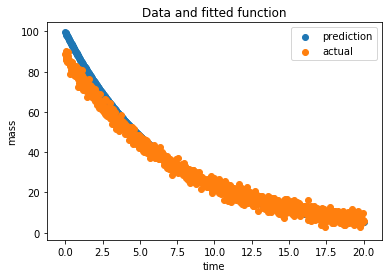

In [155]:
converged = False
k = 0.000001
count = 0
while not converged:
    idx = np.random.randint(len(mass))
    t = time[idx]
    y = mass[idx]
    prediction = m(t)
    
    dcost_dm = 2*(prediction-y)*np.exp(-a*t)
    dcost_da = 2*(prediction-y)*M*-t*np.exp(-a*t)
    if count%100000==0:
        print('prediction =',prediction)
        print('y =',y)
        print('t =',t)
        print('M =',M)
        print('a =',a)
        print('dcost_dm =',dcost_dm)
        print('dcost_da =',dcost_da)
        print('dcost_dm*k =',dcost_dm*k)
        print('dcost_da*k =',dcost_da*k)
        print('--------------------------------------------------------------')
    
    M = M - k*dcost_dm
    a = a - k*dcost_da
    
    if count == 200000:
        converged = True
        
    count += 1
    
print('M =',M)
print('a =',a)
print('t_half =',np.log(.5)/a)

h1 = plt.scatter(time,m(time))
h2= plt.scatter(time,mass)
plt.xlabel('time')
plt.ylabel('mass')
plt.legend(dict(prediction=h1,actual=h2))
plt.title('Data and fitted function')

### Some limitations of curve-fitting

There are a few main limitations of curvefitting.

1. Our initial guess function (the parameterized model) needs to be close to or exactly the same type of function that is represented by the data. It is impossible to make an accurate model of an exponential function by using the function $y(x)=mx+b$ (a straight line).

2. When making updates to the parameters, it is possible to "overshoot" the correct parameter. For instance, at the end of step 4 we found that

$$\frac{dC}{da} = -2,259,151$$

The parameter update then becomes

$$a_{next} = a_{current} - k*\frac{dC}{da} = a_{current} - 0.1*-2,259,151 = 0.0001 + 225,915.1 = 225,915.1$$

which is ridiculous. We went from $a = 0.0001$ to $a = 225915$ in a single step! This causes the algorithm to diverge, which is the opposite of converging. This means that this method will only work if we either 1) pick an "easy" problem that results in small derivatives (therefore giving small updates) or 2) work with a tiny $k$-value. In the decay problem, we saw that the final $a$ parameter gave us a half-life that was relatively close to the true value. This was only possible due to our tiny value of $k = 0.000001$.

However, notice that we didn't get $M$ right. In fact, it barely changed at all. This is because a single $k$-value doesn't always work for all parameters. If we look at the cost deriatives in step 6, we can see that $\frac{dC}{da}$ is always much, much larger than $\frac{dC}{dM}$. Therefore, we can only pick a good $k$-value for either $M$ or $a$ in this case.

This is an inherent problem with gradient descent. There are many algorithms out there to deal with this, but they involve lots of heavy math and we won't talk about them today.

## Class Exercises

### 1. Neural network

A neural network is a large function with many parameters. It is composed of layers, which each have their own parameters, and we can "stack" layers by taking the output of one layer and giving it as input to the next.

$$\sigma (x) = \frac{1}{1+e^{-x}}$$

$$ y(x) = w_1x_1 + w_2x_2 + b$$

$$Layer(x) = \sigma (y(x))$$

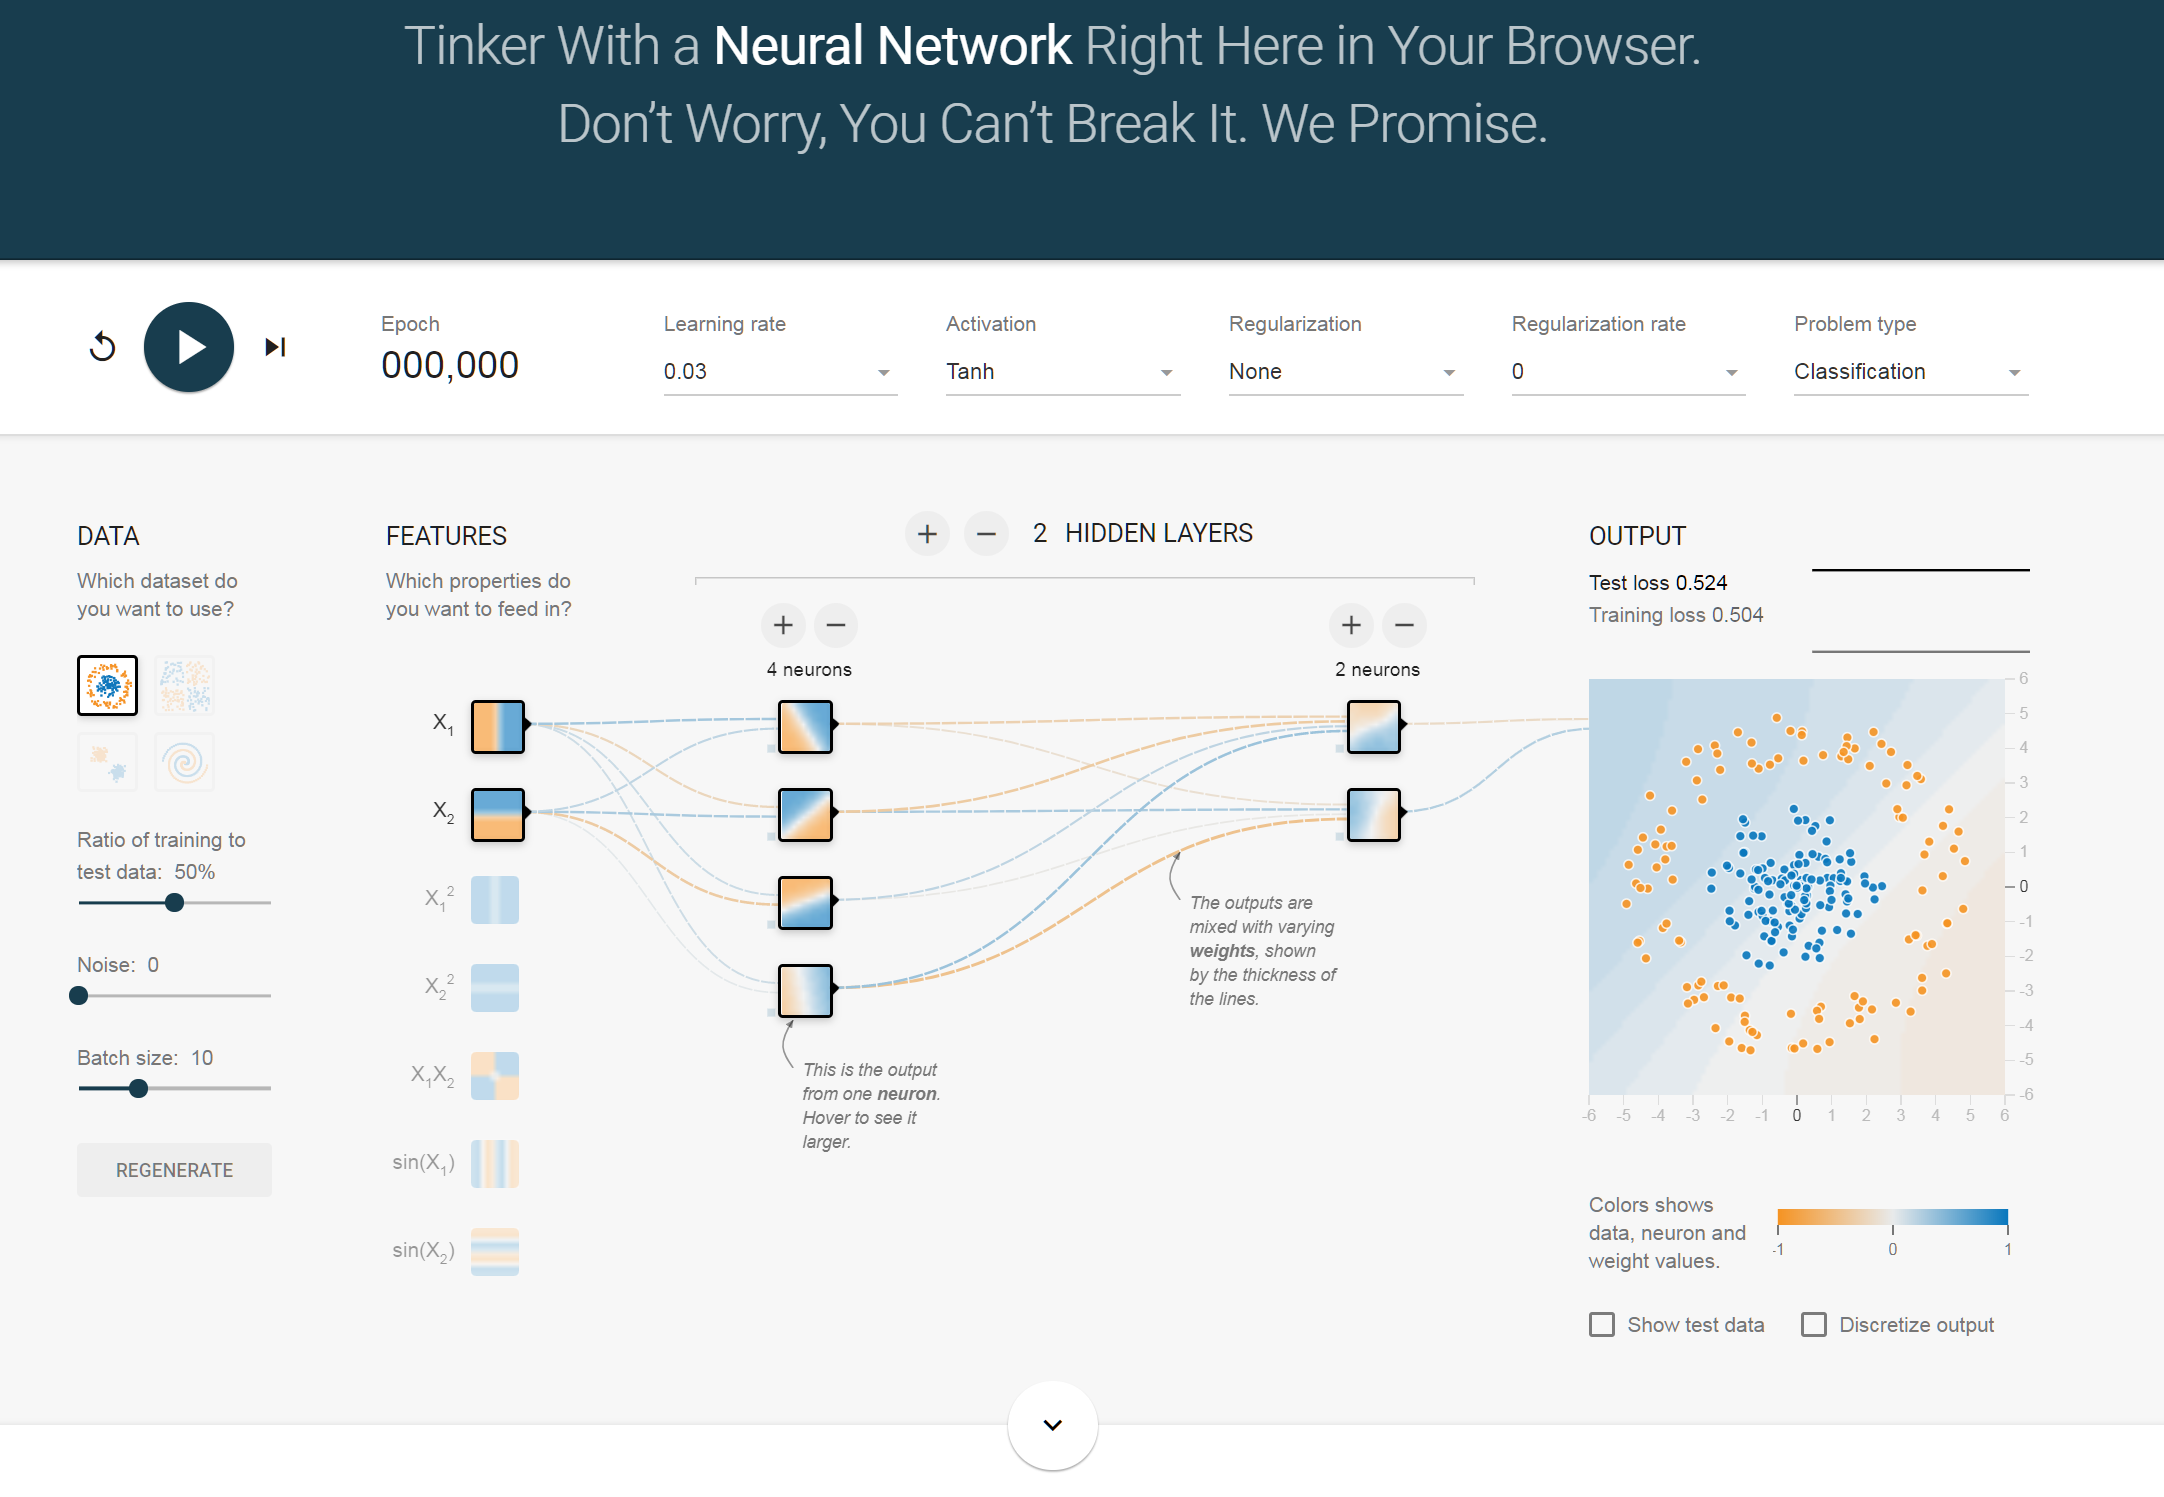

In [134]:
Image('tfpg.png')

### 2. Long throw

#### Setup

In this problem, we will use curve-fitting to find the angle that we should hit a ball at to get it in a hole (golf). You can also think of this as throwing a basketball into a hoop at a long distance. Our goal is to hit the ball at some angle $\theta$ so that it lands in the hole which is at a distance $D$ away from us. In this problem, we always hit the ball at the same velocity $v_0=20\frac{m}{s}$.

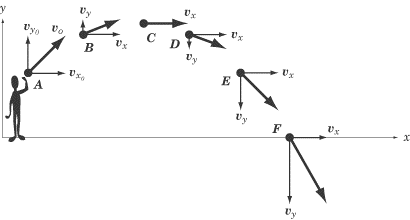

In [135]:
Image('throw.gif')

Image credit: http://www.entrytest.com/physics/chapter5section5.aspx

Relevant equations:

$$D = hole\ distance = 30m$$
$$angle = \theta\ (radians)$$
$$gravity=g=9.8\frac{m}{s^2}$$
$$initial\ velocity = v_0 = 20\frac{m}{s}$$
$$v_{x_0} = v_0cos(\theta)$$
$$v_{y_0} = v_0sin(\theta)$$

$$x(t) = v_{x0}t = v_0cos(\theta)t\ \ (rate*time)$$
$$x(t_{final}) = v_{x_0}t_{final} = final\ distance (m)$$
$$h(t) = v_{y_0}t - \frac{gt^2}{2}$$
$$h(t_{final})=0m$$

In this setup our prediction function is $x(t)$. The goal of curve-fitting is to select the parameter $\theta$ so that $x(t_{final}) = D$.

First, we need to write an equation that gives us the landing distance as a function of $\theta$. In other words, we need to find $x(t_{final})$ for a given $\theta$ so that we can compare it to the desired distance $D$.

First, find $t_{final}$ by applying $h(t_{final})=0$, and then plug in to $x$:

$$h(t_{final}) = v_{y_0}t_{final} - \frac{gt_{final}^2}{2} = 0$$
$$t_{final} = \frac{2v_{y_0}}{g}$$

Therefore, the final distance is $x(t)$ at $t_{final}$ is:

$$x(t_{final}) = v_{x_0}t_{final} = v_0cos(\theta)t_{final} = v_0cos(\theta)\frac{2v_{y_0}}{g} = v_0cos(\theta)\frac{2v_0sin(\theta)}{g}=\frac{2v_0^2}{g}cos(\theta)sin(\theta)$$

### Curve-fitting

#### Step 1: Model equation

For this problem, our parameterized equation is $x(t)$, and the parameter is the angle $\theta$. Our initial guess for the angle is

$$\theta = 18\ degrees*\frac{\pi\ rad}{180\ degrees} = 0.314\ radians$$

$$x(t_{final}) = \frac{2v_0^2}{g}cos(\theta)sin(\theta)$$

In [144]:
# As a program...

theta = 18*np.pi/180 # rad
v0 = 20 # m/s
g = 9.8 # m/s^2
D = 30 # m

def x_final(theta):
    """
    input: 
        theta - throw/hit angle
        
    output:
        x_final - x-location of the landing spot
    """
    return (2/g)*(v0**2)*np.cos(theta)*np.sin(theta)

x_final(theta)

23.991234787447876

#### Step 2: Cost function

The cost function for this problem will be the same.

$$C(x,D) = (x(t_{final}) - D)^2 = (\frac{2v_0^2}{g}cos(\theta)sin(\theta) - D)^2$$

In [146]:
theta = 0.314 # rad
v0 = 20 # m/s
g = 9.8 # m/s^2
D = 30 # m

def cost(x,D):
    return (x - D)**2

#### Step 3: Cost of a data point

$$D = 30m$$
$$\theta = 18\ degrees*\frac{pi}{180} = 0.314\ radians$$
$$C(x,D) = (\frac{2*20^2}{9.8}cos(0.314)sin(.314) - 30)^2 = 36.1$$

In [147]:
D = 30
theta = 18*np.pi/180

cost(x_final(theta),D)

36.10525937957657

#### Step 4: Derivative of cost

Derivative of cost with respect to angle (using chain rule):

$$\frac{dC}{d\theta} = 2(\frac{2v_0^2}{g}cos(\theta)sin(\theta) - D)(\frac{2v_0^2}{g})(-sin(\theta)^2 + cos(\theta)^2)$$

In [149]:
def dC_dtheta(theta,D):
    result = 2*(x_final(theta) - D)*(2/g)*(v0**2)*(-np.sin(theta)**2 + np.cos(theta)**2)
    return result

dC_dtheta(theta,D)

-793.6641913736588

#### Steps 5 and 6: Update parameters

theta (rad) = 0.41267424013924714
theta (degrees) = 23.64449227374709
x_final(theta) = 29.991191892283908


Text(0, 0.5, 'theta')

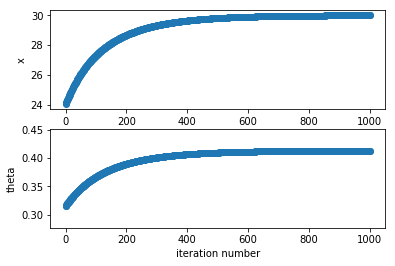

In [151]:
# Restate given values
D = 30 # m
theta = 18*np.pi/180 # rad
v0 = 20 # m/s
g = 9.8 # m/s^2

converged = False
k = 0.000001
count = 0

xvals = []
thetavals = []

while not converged:
    deriv = dC_dtheta(theta,D) # we can compute this right away since we have the equation
    theta = theta - k*dC_dtheta(theta,D)
    
    thetavals.append(theta)
    xvals.append(x_final(theta))
    
    if count == 1000:
        converged = True
        
    count += 1
        
print('theta (rad) =',theta)
print('theta (degrees) =',theta*180/np.pi)
print('x_final(theta) =',x_final(theta))

plt.subplot(2,1,1)
plt.scatter(range(len(xvals)),xvals)
plt.xlabel('iteration number')
plt.ylabel('x')

plt.subplot(2,1,2)
plt.scatter(range(len(thetavals)),thetavals)
plt.xlabel('iteration number')
plt.ylabel('theta')